In [194]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

In [195]:
# (8.a) 

df = pd.read_csv('Auto.csv')

df = df[df['horsepower'] != '?']

X = df[['horsepower']]  # Predictor needs to be 2D (n X 1 matrix)
y = df['mpg']        

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f"Intercept: {model.intercept_:.4f}")
print(f"Slope: {model.coef_[0]:.4f}")

n = len(y)

residual = y - y_pred

# Residual Sum of Squares (RSS)
RSS = np.sum(residual ** 2)

residual_variance = RSS / (n-2)

x = X['horsepower'].to_numpy(dtype=np.float64)

x_mean = np.mean(x)

# Standard Error (SE)
SE_beta1 = np.sqrt(residual_variance / np.sum((x - x_mean) ** 2))

print(f"Standard Error of slope (beta_1): {SE_beta1:.4f}")

SE_beta0 = np.sqrt(residual_variance * (1/n + (x_mean ** 2) / np.sum((x - x_mean) ** 2)))

print(f"Standard Error of intercept (beta_0): {SE_beta0:.4f}")

# t-statistics
t_beta1 = model.coef_[0] / SE_beta1
t_beta0 = model.intercept_ / SE_beta0

print(f"t-statistic (intercept): {t_beta0:.4f}")
print(f"t-statistic (slope): {t_beta1:.4f}")


# What is the predicted mpg for horsepower of 98 ? 

x0 = 98
y_hat = model.intercept_ + model.coef_[0] * x0
print(f"Predicted MPG for horsepower 98 =  {y_hat:.3f}")

Intercept: 39.9359
Slope: -0.1578
Standard Error of slope (beta_1): 0.0064
Standard Error of intercept (beta_0): 0.7175
t-statistic (intercept): 55.6598
t-statistic (slope): -24.4891
Predicted MPG for horsepower 98 =  24.467


In [196]:
# Use of statsmodels library

df = pd.read_csv('Auto.csv')

# data cleaning and filling the NaN with mean
hp_df = pd.to_numeric(df['horsepower'], downcast='float', errors='coerce') 
hp_df = hp_df.fillna(value=hp_df.mean())
df['horsepower'] = hp_df

X = df['horsepower']
X = sm.add_constant(X)

y = df['mpg']

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           1.45e-79
Time:                        12:58:49   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.0

In [197]:
# What is the predicted mpg for horsepower of 98 ? What is the associated 95% confidence and prediction intervals ?

prediction = results.get_prediction(np.array([1, 98]))
summary = prediction.summary_frame(alpha = 0.05) # 95% intervals

print(summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.537028  0.253797      24.038067      25.035989     14.722193   

   obs_ci_upper  
0     34.351862  


In [198]:
# summary['mean']	       --> returns a Series (column "mean")

# summary['mean'].iloc[0]  --> returns the first value from it

predicted_mpg = summary['mean'].iloc[0]

confidence_intervals = (summary['mean_ci_lower'].iloc[0], summary['mean_ci_upper'].iloc[0])

prediction_intervals = (summary['obs_ci_lower'].iloc[0], summary['obs_ci_upper'].iloc[0])

print(f"Predicted MPG for 98 horsepower: {predicted_mpg:.3f}")
print(f"95% Confidence Interval: {confidence_intervals}")
print(f"95% Prediction Interval: {prediction_intervals}")

Predicted MPG for 98 horsepower: 24.537
95% Confidence Interval: (24.038066931477164, 25.035988684592315)
95% Prediction Interval: (14.722193165330419, 34.35186245073906)


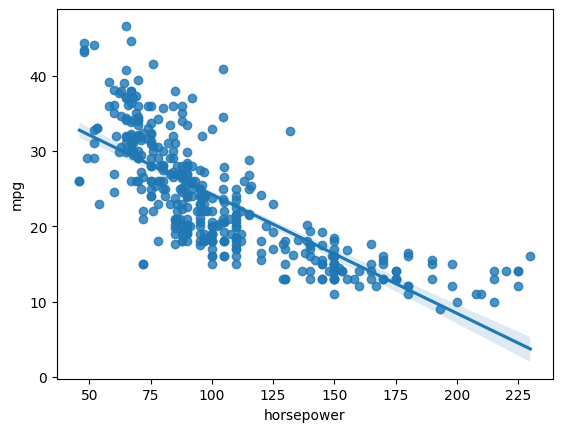

In [199]:
# (8.b)

# Plot the response and the predictor. Display the least squares regression line 

# x-axis : X
# y-axis : y_pred 

sns.regplot(x='horsepower', y='mpg', data=df)
X = sm.add_constant(df['horsepower'])
est = sm.OLS(df['mpg'], X).fit()

<Axes: xlabel='horsepower', ylabel='mpg'>

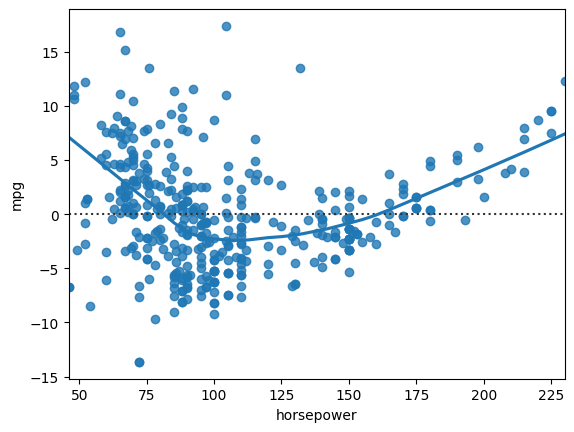

In [200]:
# (8.c) Produce some of diagnostic plots of the least squares regression fit 

# x-axis : X
# y-axis : y - y_pred

sns.residplot(x='horsepower', y='mpg', data=df, lowess=True)

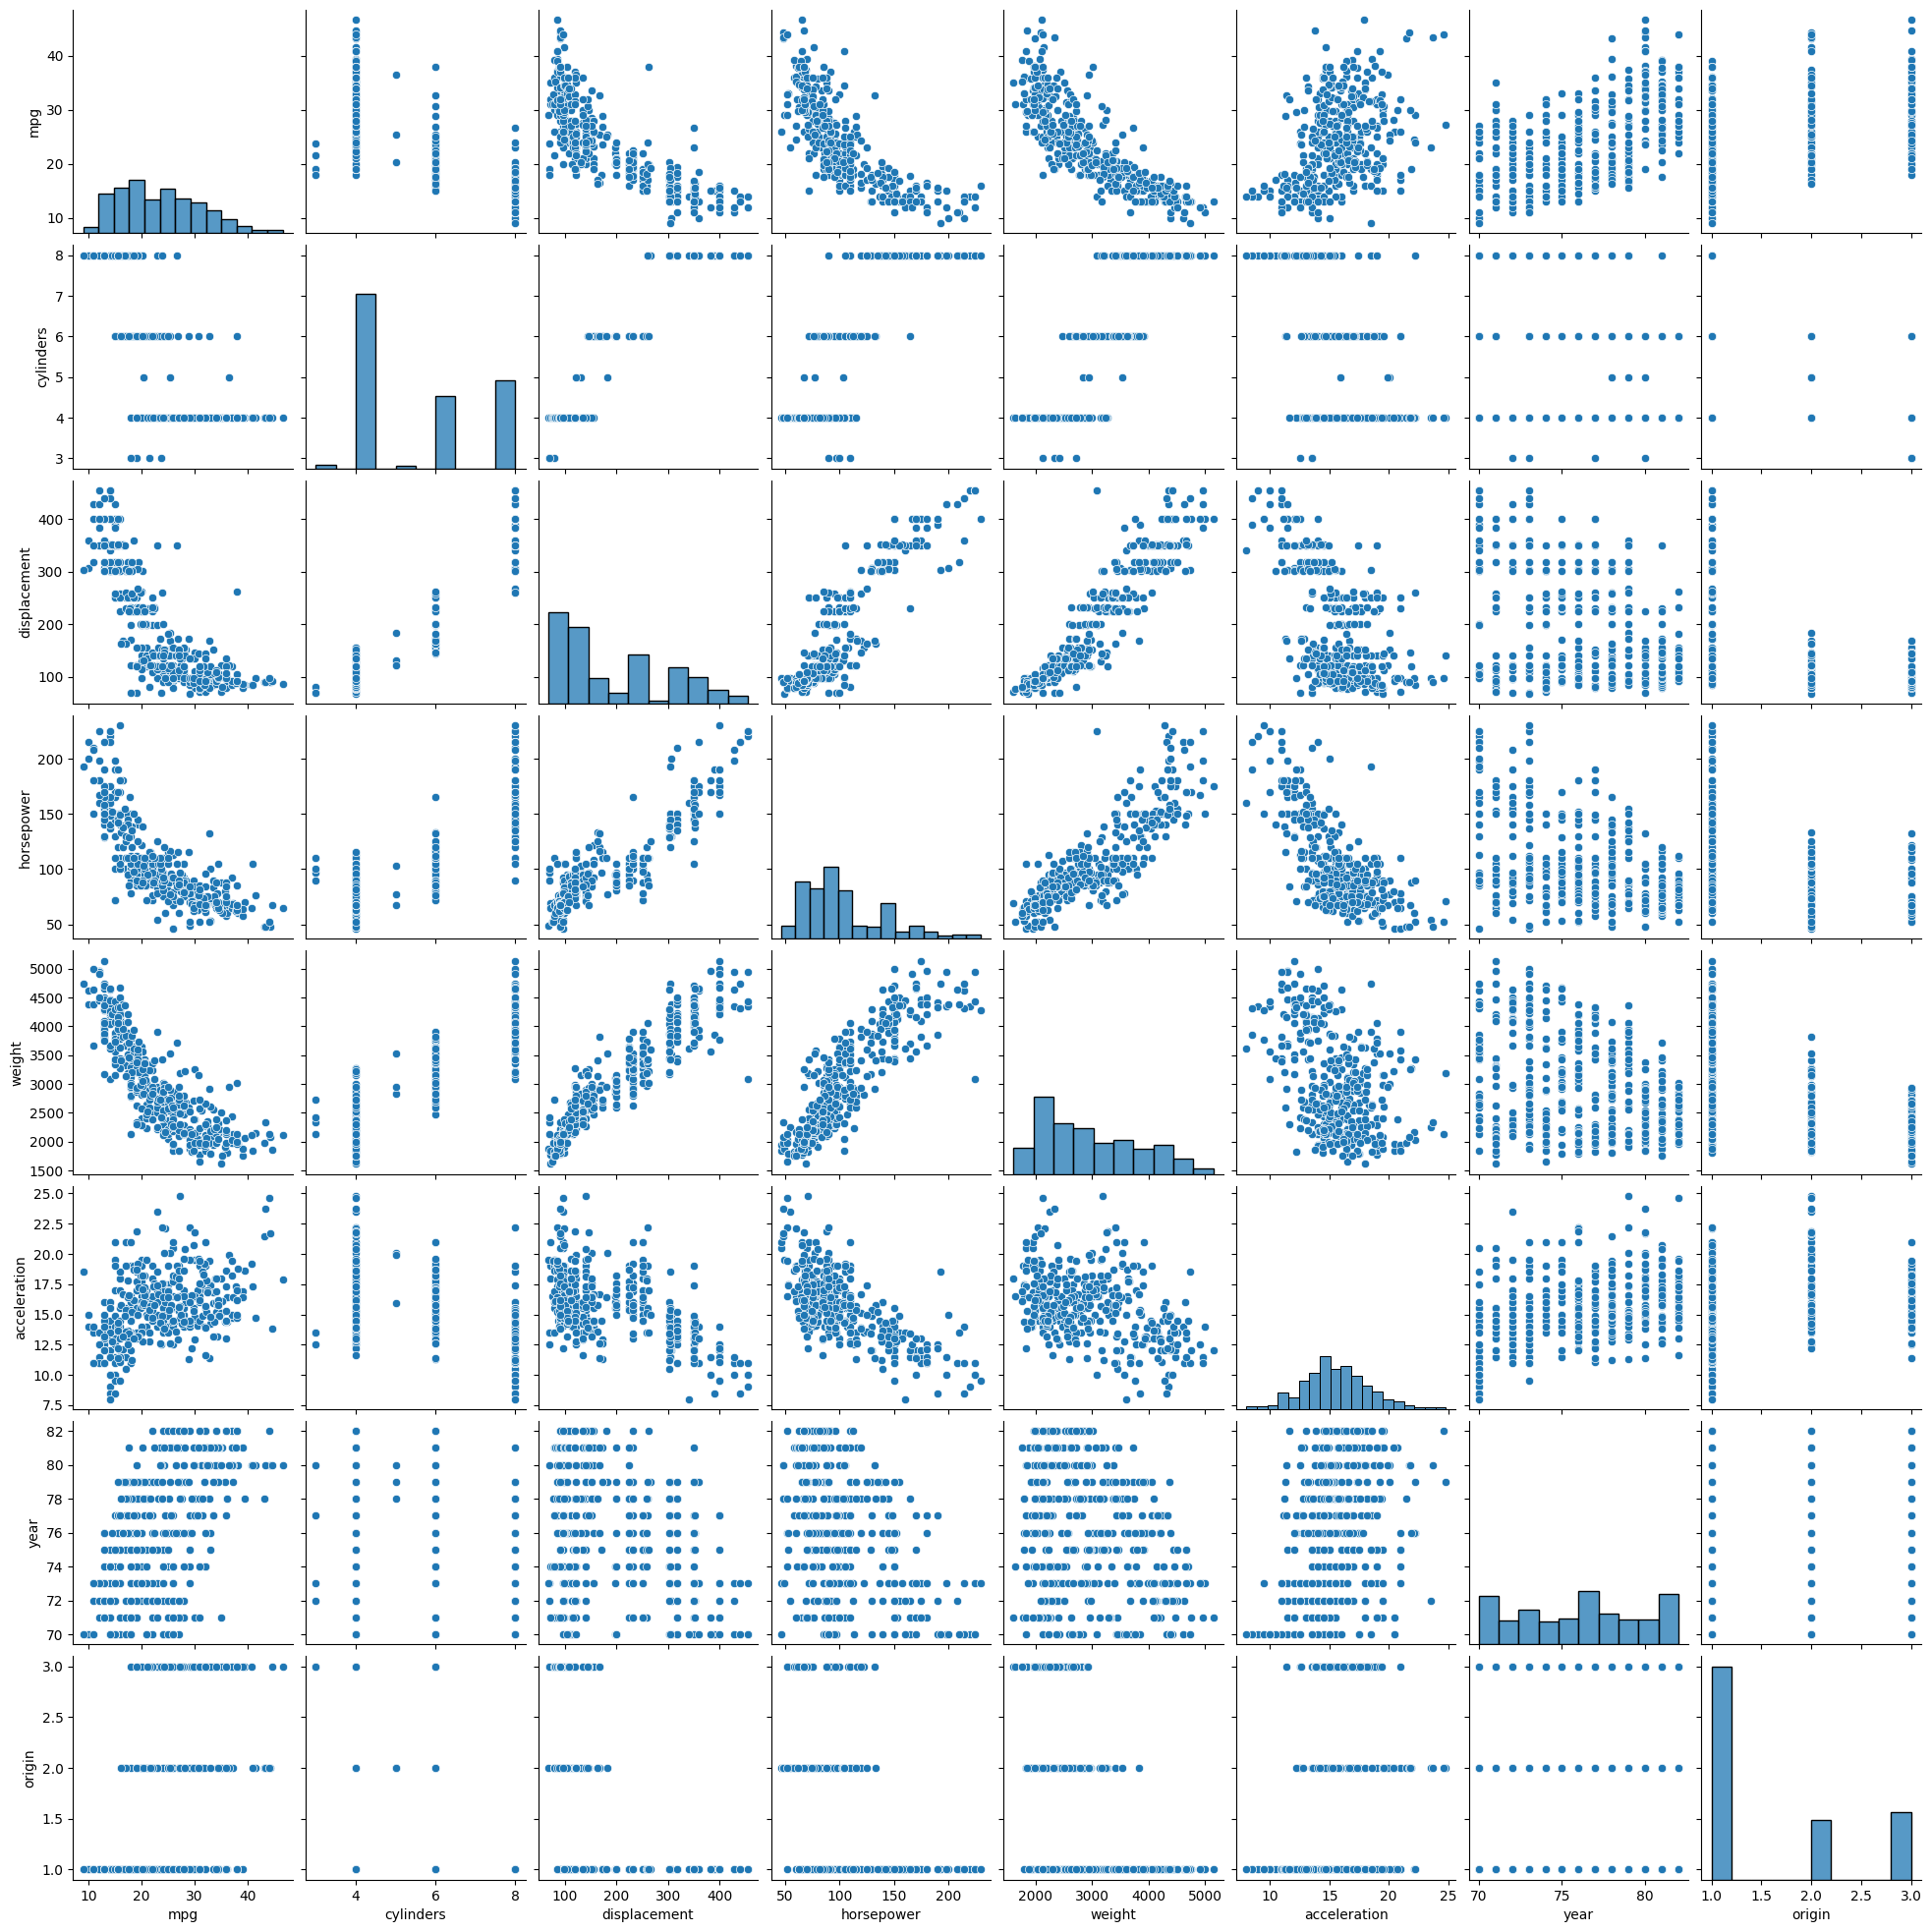

In [201]:
# (9.a) Produce a scatterplot matrix which includes all of the variables in the data set

sns.pairplot(df)

<Axes: >

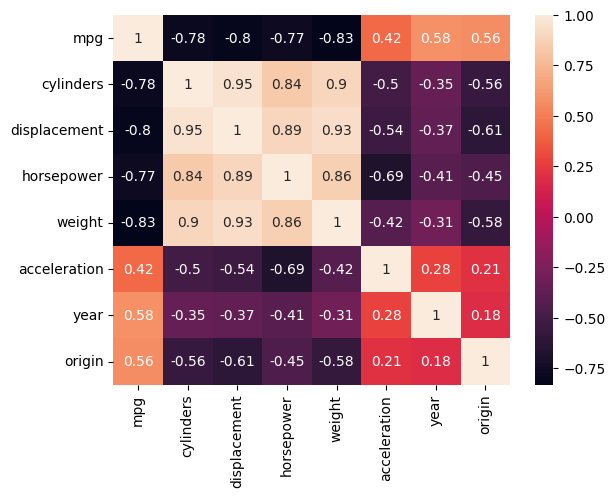

In [202]:
# (9.b) Compute the matrix of correlations between the variables using the function cor()

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [203]:
# (9.c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors

X = df.drop(columns = ['name', 'mpg']) 

X = sm.add_constant(X)

y = df['mpg']

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          2.41e-141
Time:                        12:58:55   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060   

In [204]:
# F-statistics is 256.0 -> hence a statistiaclly significant relationship exist

# displacement, year, origin and weight are statistiaclly significant as p-value < 0.05

# The coefficient 'year' is large relative to the others - it is an important predictor

<Axes: >

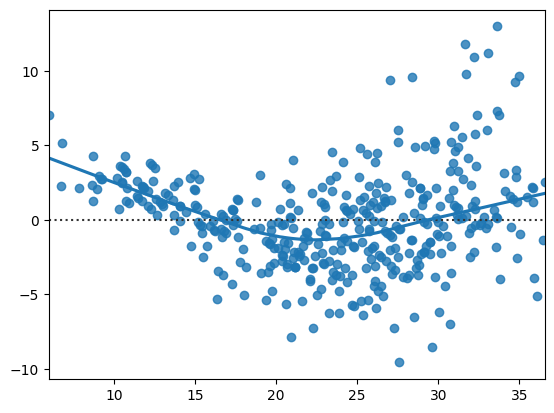

In [205]:
# (9.d) Produce diagnostic plots of the linear regression fit

# x-axis : y_pred
# y-axis : y - y_pred

y_pred = results.predict(X)

residuals = y - y_pred

sns.residplot(x=y_pred, y=residuals, lowess=True)

In [206]:
# (10)

df = pd.read_csv('carseats.csv')

df = df.drop('Unnamed: 0', axis=1)

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [207]:
# (10.a)

import statsmodels.formula.api as smf
import patsy

f = 'Sales ~ Price + Urban + US'

model = smf.ols(formula = f, data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           2.39e-23
Time:                        12:58:58   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [208]:
# Intercept, US and Price are statistically significant, but Urban is NOT 

# for Intercept, US and Price, we can reject the NULL hypothesis

# (10.e)

f = 'Sales ~ Price + US'

model = smf.ols(formula = f, data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           2.66e-24
Time:                        12:58:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [209]:
# (10.f) How well do the model (e) fit the data?

# R-squared score for the models in (a) and (e) is 0.239

# 23.9% of the variance in Sales is explained by price and US

# F-statistic increases from 41.52 to 62.43 when one removes Urban predictor

# Hence, the Urban predictor not contributing useful information and adding multicollinearity to the model


In [210]:
# predict outcomes

y, X = patsy.dmatrices(f, df, return_type='dataframe')

model = sm.OLS(y, X).fit()

y_pred = model.predict(X)

In [211]:
# (10.g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s)

model.conf_int(0.05)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


In [212]:
# (11)

rng = np.random. default_rng (1)

x = rng.normal(size =100)

y = 2 * x + rng.normal(size =100)

df = pd.DataFrame(data = {'x' : x, 'y' : y})

df.head()

,x,y
0,0.345584,0.039887
1,0.821618,2.505681
2,0.330437,0.535282
3,-1.303157,-1.937161
4,0.905356,3.029555


In [213]:
# (11.a) linear regression of y onto x without any intercept 

f = 'y ~ x - 1'

model = smf.ols(formula = f, data = df).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sat, 05 Jul 2025   Prob (F-statistic):                    6.23e-31
Time:                        12:59:01   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [214]:
# (11.b) linear regression of x onto y without any intercept

f = 'x ~ y - 1'

model = smf.ols(formula = f, data = df).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sat, 05 Jul 2025   Prob (F-statistic):                    6.23e-31
Time:                        12:59:01   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [215]:
# (11.f)

print(smf.ols(formula = 'x ~ y', data = df).fit().summary())

print(smf.ols(formula = 'y ~ x', data = df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           1.74e-30
Time:                        12:59:01   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0095      0.044      0.216      0.8

In [216]:
# (12.a) Under what circumstance is the coefficient estimate for the regression of X onto Y the same as 
#        the coefficient estimate for the regression of Y onto X?

# var(x) = var(y)

In [217]:
# (12.b)

x = np.random.randn(100)
y = np.random.randn(100)

df = pd.DataFrame({'x' : x, 'y' : y})

print(smf.ols(formula = 'x ~ y', data = df).fit().summary())

print(smf.ols(formula = 'y ~ x', data = df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7947
Date:                Sat, 05 Jul 2025   Prob (F-statistic):              0.375
Time:                        12:59:02   Log-Likelihood:                -144.98
No. Observations:                 100   AIC:                             294.0
Df Residuals:                      98   BIC:                             299.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0532      0.105      0.507      0.6

In [218]:
# (12.c) 

x = np.arange(100) 
y = np.arange(100)[::-1]

# x = [0, 2, ..., 99], y = [99, 98, ...., 0, 1]
# var(x) = var(y)

df = pd.DataFrame({'x' : x, 'y' : y})

print(smf.ols(formula = 'x ~ y - 1', data = df).fit().summary())

print(smf.ols(formula = 'y ~ x - 1', data = df).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.243
Model:                            OLS   Adj. R-squared (uncentered):              0.235
Method:                 Least Squares   F-statistic:                              31.70
Date:                Sat, 05 Jul 2025   Prob (F-statistic):                    1.69e-07
Time:                        12:59:03   Log-Likelihood:                         -532.84
No. Observations:                 100   AIC:                                      1068.
Df Residuals:                      99   BIC:                                      1070.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [219]:
# (13.a) 

np.random.seed(1)

x = np.random.normal(0, 1, 100)

In [220]:
# (13.b)

eps = np.random.normal(0, 0.25, 100)

In [221]:
# (13.c)

y = -1 + 0.5 * x + eps

<Axes: >

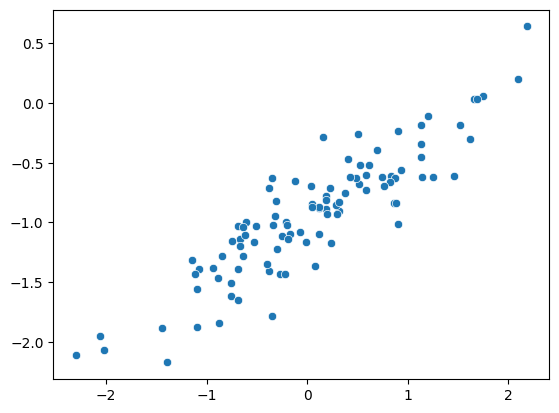

In [222]:
# (13.d)

sns.scatterplot(x=x, y=y)

In [223]:
# (13.e)

df = pd.DataFrame({'x' : x, 'y' : y})

f = 'y ~ x'

model = smf.ols(formula = f, data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           5.39e-36
Time:                        12:59:04   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

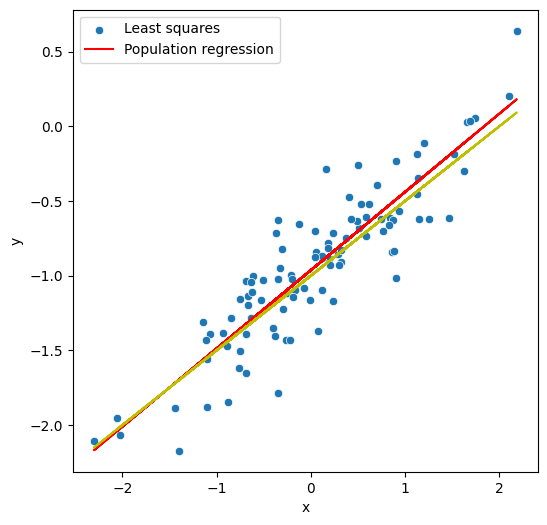

In [224]:
# (13.f) 

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')

ax = sns.scatterplot(x=x, y=y)

y_pred = model.predict()
y_actual = -1 + 0.5 * x

ax.plot(x, y_pred, color='r') # least sqaure line 
ax.plot(x, y_actual, color='y') # population regression line 

ax.legend(['Least squares', 'Population regression']);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           1.32e-34
Time:                        12:59:05   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9663      0.029    -33.486   

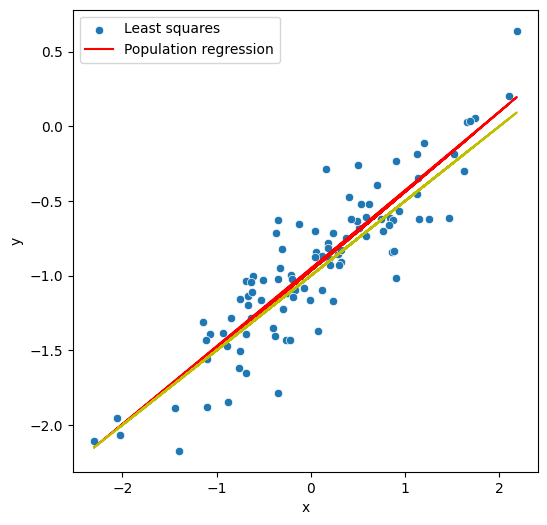

In [225]:
# (13.g)

f = 'y ~ x + np.square(x)'

model = smf.ols(formula = f, data = df).fit()

print(model.summary())

plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')

ax = sns.scatterplot(x=x, y=y)

y_pred = model.predict()
y_actual = -1 + 0.5 * x

ax.plot(x, y_pred, color='r') # least sqaure line 
ax.plot(x, y_actual, color='y') # population regression line 

ax.legend(['Least squares', 'Population regression']);

In [226]:
# The p-value > 0.05 for this variable suggests that it is not statistically significant in representing our data

# The R-squared value is identical, hence the quadratic model hasn't reduced the error of our model in fitting the data

# Overall the quadratic term does not seem to have improved our model.

In [128]:
# (13.h)

eps = np.random.normal(0, 0.025, 100) # reduced the variance from 0.25 to 0.025 

In [129]:
# (13.i)

eps = np.random.normal(0, 0.75, 100) # increased the variance from 0.25 to 0.75 

In [137]:
# (14.a)

rng = np.random. default_rng (10)

x1 = rng.uniform (0, 1, size =100)

x2 = 0.5 * x1 + rng.normal(size =100) / 10

y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

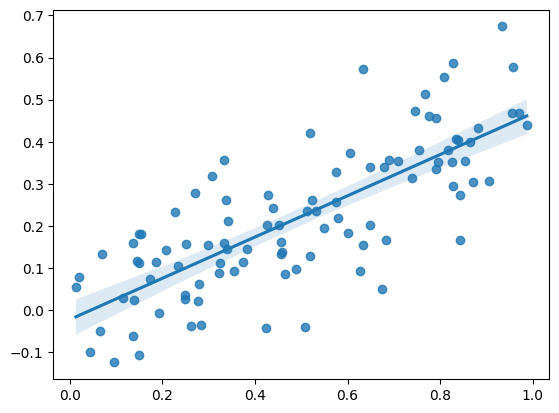

In [138]:
# (14.b) What is the correlation between x1 and x2 ?

sns.regplot(x=x1, y=x2)

np.corrcoef(x1, x2)

<Axes: xlabel='x1', ylabel='x2'>

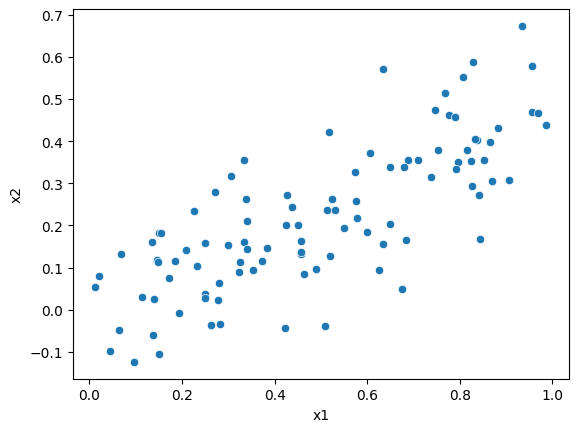

In [139]:
sns.scatterplot(x='x1', y='x2', data=df) # same as above but without the regression line

In [140]:
# (14.d)

f = 'y ~ x1 + x2'

df = pd.DataFrame({'x1' : x1, 'x2' : x2, 'y' : y})

model = smf.ols(formula = f, data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           5.76e-08
Time:                        11:36:40   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9579      0.190     10.319      0.0

In [141]:
# (14.e)

f = 'y ~ x1'

model = smf.ols(formula=f, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           1.37e-08
Time:                        11:38:11   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9371      0.189     10.242      0.0

In [142]:
# (14.f)

f = 'y ~ x2'

model = smf.ols(formula=f, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           7.43e-07
Time:                        11:38:25   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3239      0.154     15.124      0.0

In [143]:
# (14.f)

# In the absence of eachother each predictor has a statistically significant relationsip with the indipendent variable

# In the presence of eachother, it is not possible to seperate the effects of the predictors as they are colinear. 
# This increases the standard error, reducing the t-statistic and results in a p-value that is not statistically significant.


In [146]:
# (14.g)

x1 = np.concatenate ([x1 , [0.1]])

x2 = np.concatenate ([x2 , [0.8]])

y = np.concatenate ([y, [6]])

f = 'y ~ x1 + x2'

df = pd.DataFrame({'x1' : x1, 'x2' : x2, 'y' : y})

model = smf.ols(formula = f, data = df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     22.92
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           6.60e-09
Time:                        12:01:01   Log-Likelihood:                -137.93
No. Observations:                 102   AIC:                             281.9
Df Residuals:                      99   BIC:                             289.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1121      0.193     10.952      0.0

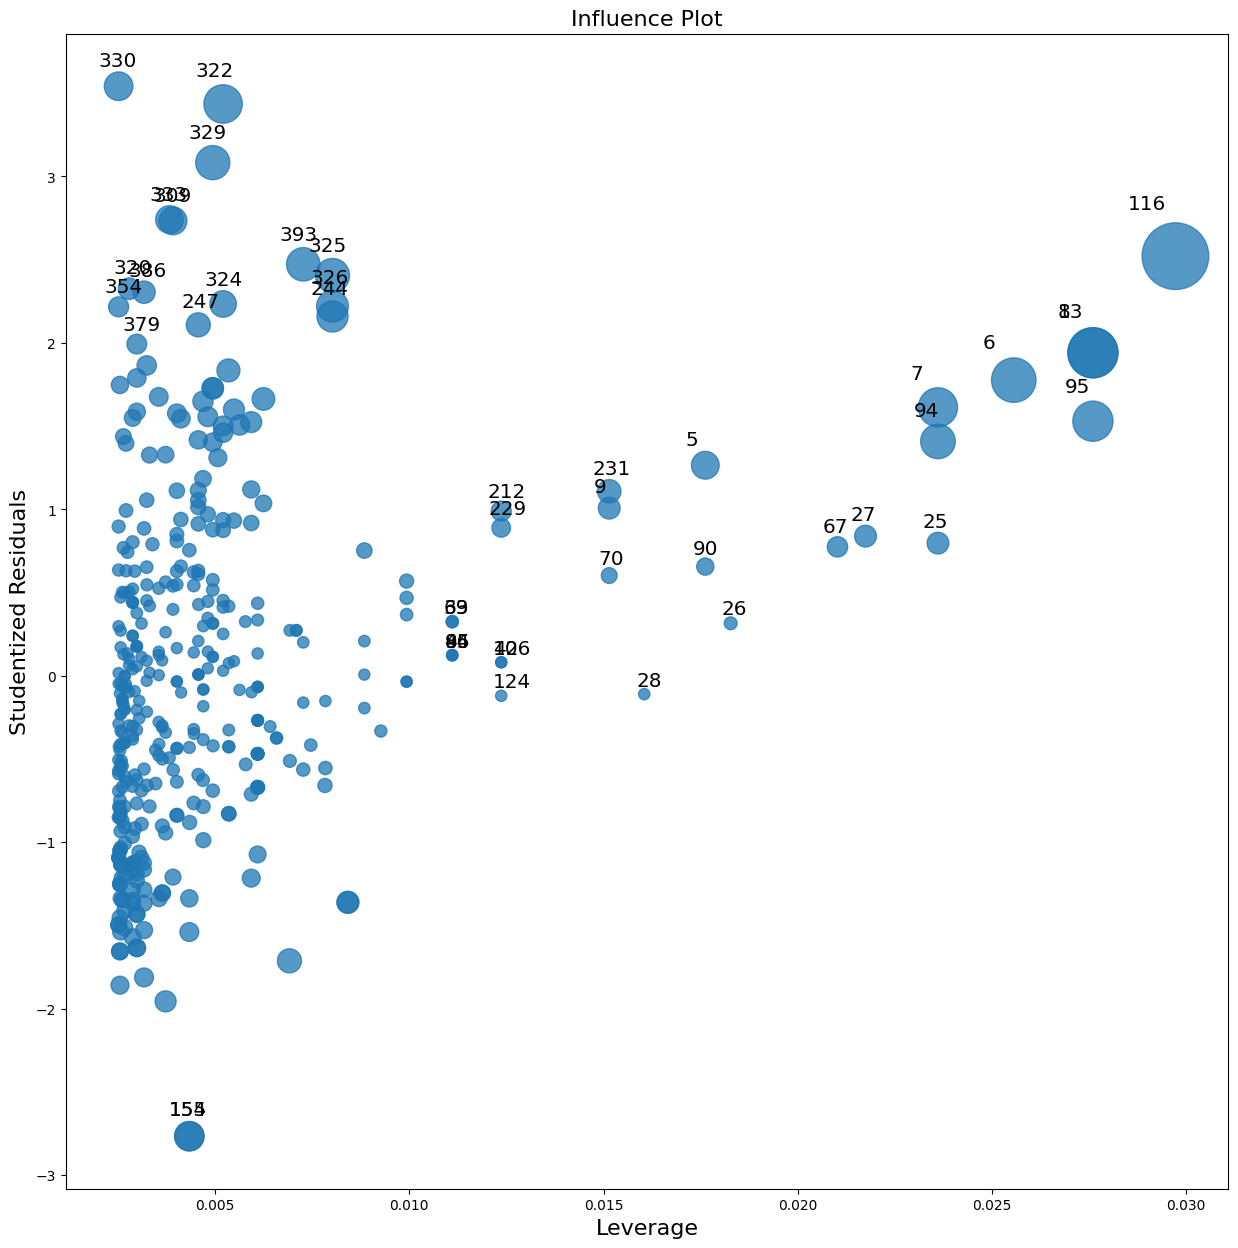

In [147]:
# Plot the high-leverage point

fig, ax = plt.subplots(figsize=(15,15))
fig = sm.graphics.influence_plot(est,ax=ax, criterion="cooks")

In [186]:
# (15.a) 

df = pd.read_csv('BostonHousing.csv')

df = df.drop(columns = 'CAT. MEDV')

df.head()

# df.columns returns a pandas.Index object
X = df.columns.drop('CRIM')

coef_model_a = []

for x in X:
    f = 'CRIM ~ {}'.format(x)
    model = smf.ols(formula = f, data = df).fit()
    print(model.summary())
    coef_model_a.append(model.params[x])

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           5.51e-06
Time:                        12:55:27   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

In [187]:
# (15

X = df.drop(columns = 'CRIM')
X = sm.add_constant(X)

y = df['CRIM']

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           2.03e-56
Time:                        12:55:31   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

In [188]:
# (15.b) alternate method

response   = 'CRIM'

predictors = df.columns.drop(response)

f = '{} ~ {}'.format(response, '+'.join(predictors))

model_b = smf.ols(formula = f, data = df).fit()

print(model_b.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           2.03e-56
Time:                        12:55:32   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.0

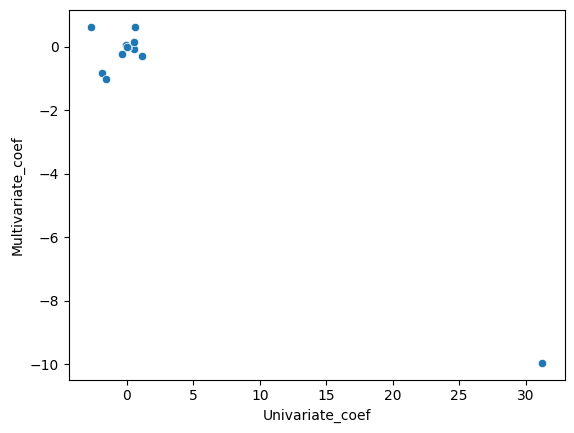

In [189]:
# (15.c) 

univariate_params = coef_model_a

multivariate_params = model_b.params[1:]

df = pd.DataFrame({'Univariate_coef': univariate_params, 'Multivariate_coef': multivariate_params,})

df.head()

sns.scatterplot(x='Univariate_coef', y='Multivariate_coef', data=df);

In [193]:
# (15.d)

df = pd.read_csv('BostonHousing.csv')

df = df.drop(columns = 'CAT. MEDV')

df.head()

# df.columns returns a pandas.Index object
X = df.columns.drop('CRIM')

X = df.columns

for x in X:
    f = 'CRIM ~ {0} + I({0} ** 2) + I({0} ** 3)'.format(x)
    model = smf.ols(formula = f, data = df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.062e+27
Date:                Sat, 05 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:58:33   Log-Likelihood:                 12810.
No. Observations:                 506   AIC:                        -2.561e+04
Df Residuals:                     502   BIC:                        -2.560e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.215e-12   1.31e-13     -9.264   